### Carga del csv

In [1]:
!pip install pandas

In [10]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [ ]:
# Carga de datos
df = pd.read_csv(r"C:\Users\sexto\OneDrive - Universidad de los andes\Maestría\2025-10\ANALÍTICA COMPUTACIONAL-LAPTOP-RF3RL1HJ\Proyectos\Proyecto 2\datos_limpios.csv")


# Mostrar las primeras filas
df.head()

,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,ESTU_DEPTO_RESIDE,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,EDAD
0,N,B,TÉCNICO/ACADÉMICO,MASCULINO,COMPLETA,bogota,M,Tres,Postgrado,Educación profesional completa,Estrato 4,Tres,Si,Si,Si,Si,437,17.0
1,N,B,TÉCNICO,MIXTO,MAÑANA,valle,M,Dos,Postgrado,Secundaria (Bachillerato) completa,Estrato 3,Tres,Si,Si,Si,Si,355,16.0
2,S,B,ACADÉMICO,MIXTO,COMPLETA,valle,M,Cuatro,Educación profesional incompleta,Educación profesional completa,Estrato 6,Cinco,Si,Si,Si,Si,363,19.0
3,S,B,ACADÉMICO,MIXTO,MAÑANA,valle,M,Tres,Educación profesional completa,Educación profesional completa,Estrato 6,Tres,Si,Si,Si,Si,350,20.0
4,S,B,ACADÉMICO,MIXTO,COMPLETA,risaralda,M,Dos,Postgrado,Educación profesional completa,Estrato 6,Dos,Si,Si,Si,Si,378,17.0


### Análisis exploratorio e ingeniería de características

In [9]:
# Dimensiones
print("Dimensiones:", df.shape)

# Valores faltantes
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
df[["PUNT_GLOBAL", "EDAD"]].describe()

Dimensiones: (476354, 18)

Valores nulos por columna:
COLE_BILINGUE           0
COLE_CALENDARIO         0
COLE_CARACTER           0
COLE_GENERO             0
COLE_JORNADA            0
ESTU_DEPTO_RESIDE       0
ESTU_GENERO             0
FAMI_CUARTOSHOGAR       0
FAMI_EDUCACIONMADRE     0
FAMI_EDUCACIONPADRE     0
FAMI_ESTRATOVIVIENDA    0
FAMI_PERSONASHOGAR      0
FAMI_TIENEAUTOMOVIL     0
FAMI_TIENECOMPUTADOR    0
FAMI_TIENEINTERNET      0
FAMI_TIENELAVADORA      0
PUNT_GLOBAL             0
EDAD                    0
dtype: int64


,PUNT_GLOBAL,EDAD
count,476354.000000,476354.000000
mean,262.203517,17.369534
std,48.360827,1.716634
min,37.000000,12.000000
25%,226.000000,16.000000
50%,261.000000,17.000000
75%,295.000000,18.000000
max,494.000000,30.000000


C:\Users\sexto\AppData\Local\Temp\ipykernel_544\2485513200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cuartil_edad", y="PUNT_GLOBAL", data=df, palette="Set2")


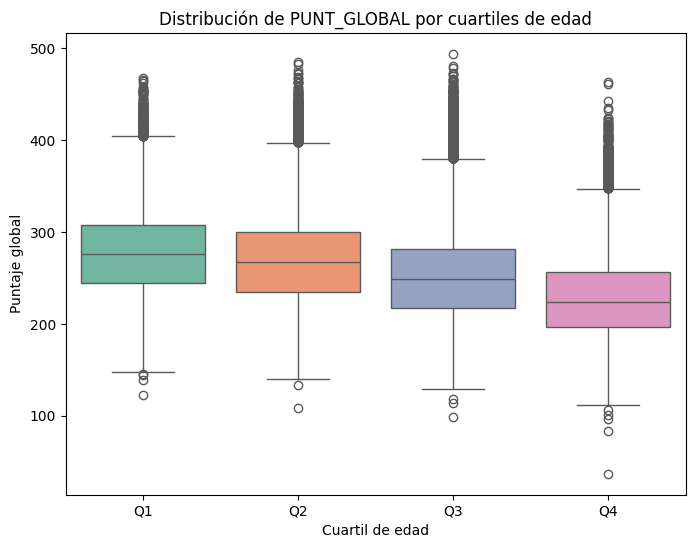

In [11]:
# Dividir edad en cuartiles
df["cuartil_edad"] = pd.qcut(df["EDAD"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Boxplot de PUNT_GLOBAL por cuartil de edad
plt.figure(figsize=(8, 6))
sns.boxplot(x="cuartil_edad", y="PUNT_GLOBAL", data=df, palette="Set2")
plt.title("Distribución de PUNT_GLOBAL por cuartiles de edad")
plt.xlabel("Cuartil de edad")
plt.ylabel("Puntaje global")
plt.show()

C:\Users\sexto\AppData\Local\Temp\ipykernel_544\3572145488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cuartil_edad", y="PUNT_GLOBAL", data=df, palette="Set2")


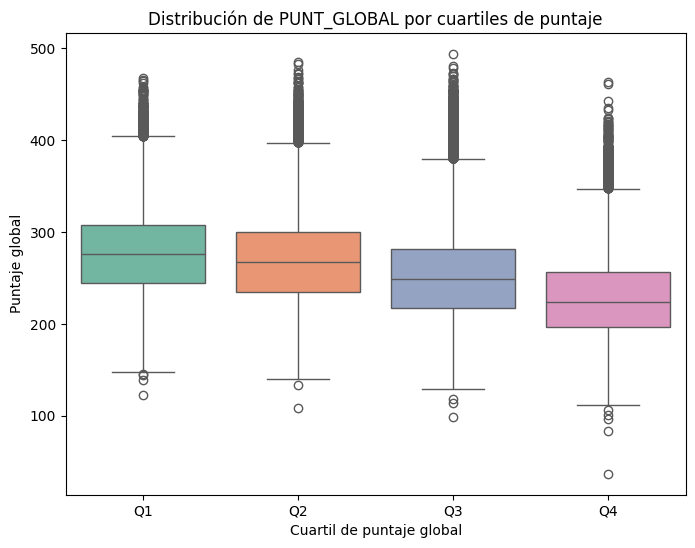

In [15]:
# Dividir puntaje en cuartiles
df["cuartil_puntaje"] = pd.qcut(df["PUNT_GLOBAL"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Boxplot de PUNT_GLOBAL por cuartil de puntaje
plt.figure(figsize=(8, 6))
sns.boxplot(x="cuartil_edad", y="PUNT_GLOBAL", data=df, palette="Set2")
plt.title("Distribución de PUNT_GLOBAL por cuartiles de puntaje")
plt.xlabel("Cuartil de puntaje global")
plt.ylabel("Puntaje global")
plt.show()

C:\Users\sexto\AppData\Local\Temp\ipykernel_544\4123382055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="puntaje_cat", y="PUNT_GLOBAL", data=df, palette="Set2")


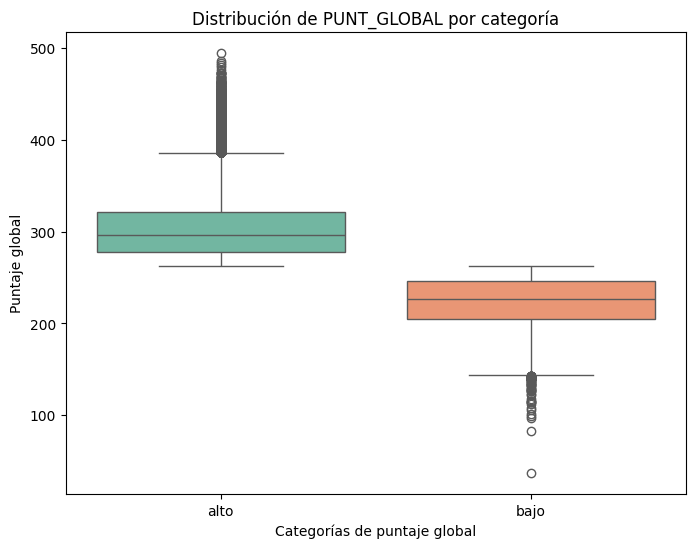

In [16]:
# Dividir puntaje
# "Bajo" si el puntaje global es <= media del puntaje, "alto" de lo contrario
# media
media_puntaje = df["PUNT_GLOBAL"].mean()
# nueva columna categórica
df["puntaje_cat"] = np.where(df["PUNT_GLOBAL"] <= media_puntaje, "bajo", "alto")

# Boxplot de PUNT_GLOBAL por cuartil de puntaje
plt.figure(figsize=(8, 6))
sns.boxplot(x="puntaje_cat", y="PUNT_GLOBAL", data=df, palette="Set2")
plt.title("Distribución de PUNT_GLOBAL por categoría")
plt.xlabel("Categorías de puntaje global")
plt.ylabel("Puntaje global")
plt.show()

In [17]:
df["puntaje_cat"].value_counts()

puntaje_cat
bajo    245252
alto    231102
Name: count, dtype: int64

##### Puntaje Global vs cada variable categórica

Index(['COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_GENERO',
       'COLE_JORNADA', 'ESTU_DEPTO_RESIDE', 'ESTU_GENERO', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'cuartil_edad',
       'cuartil_puntaje'],
      dtype='object')


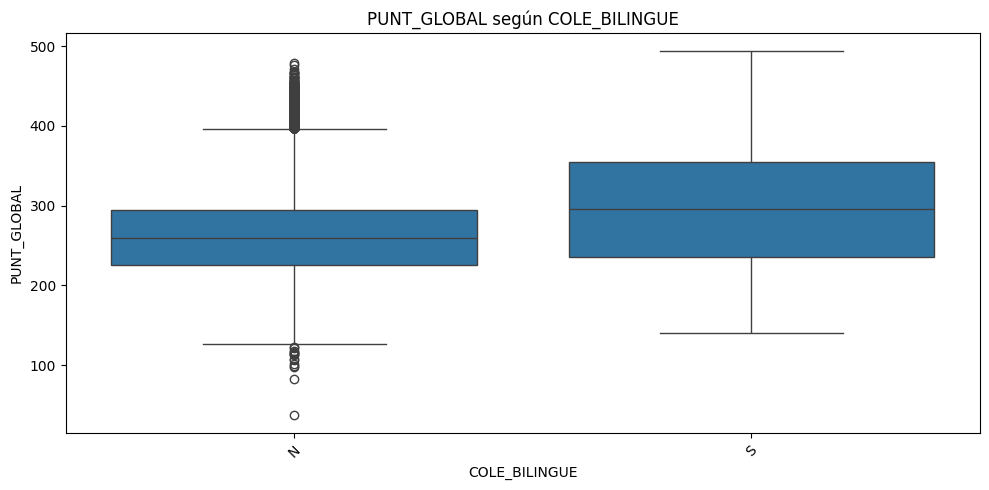

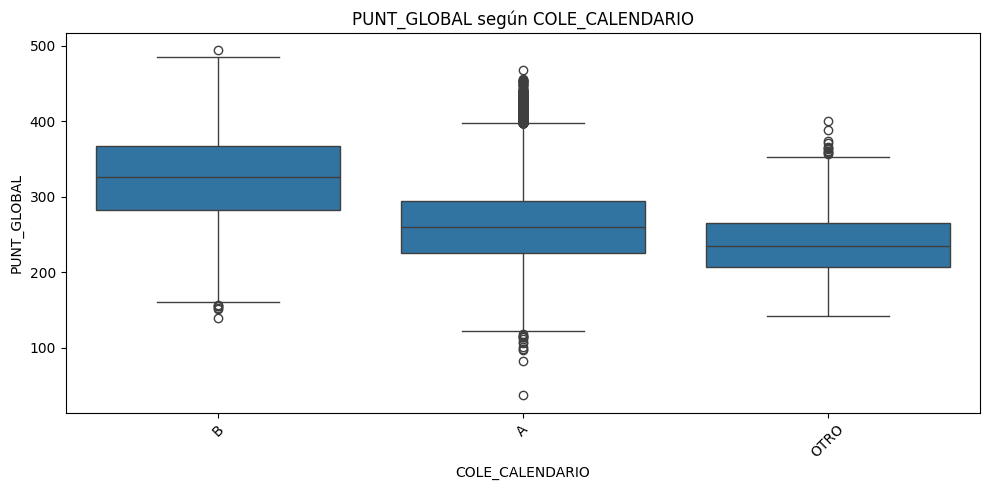

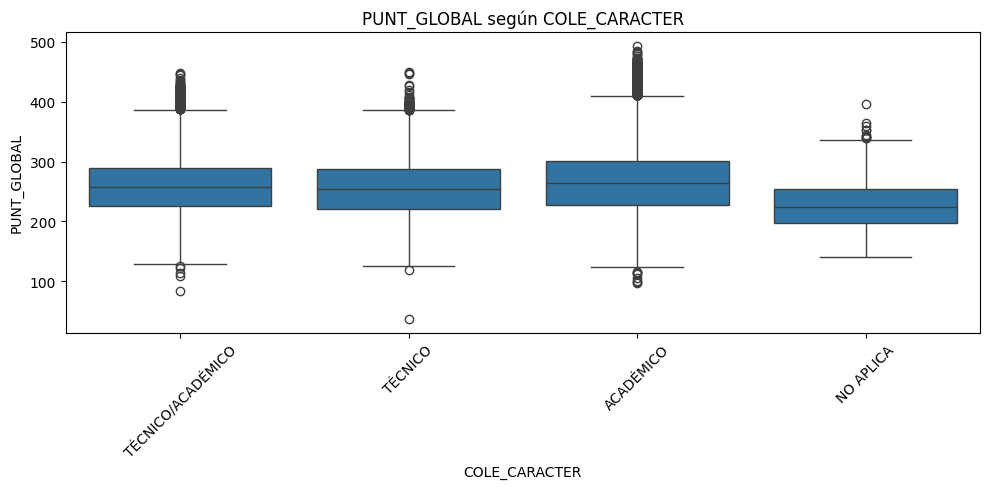

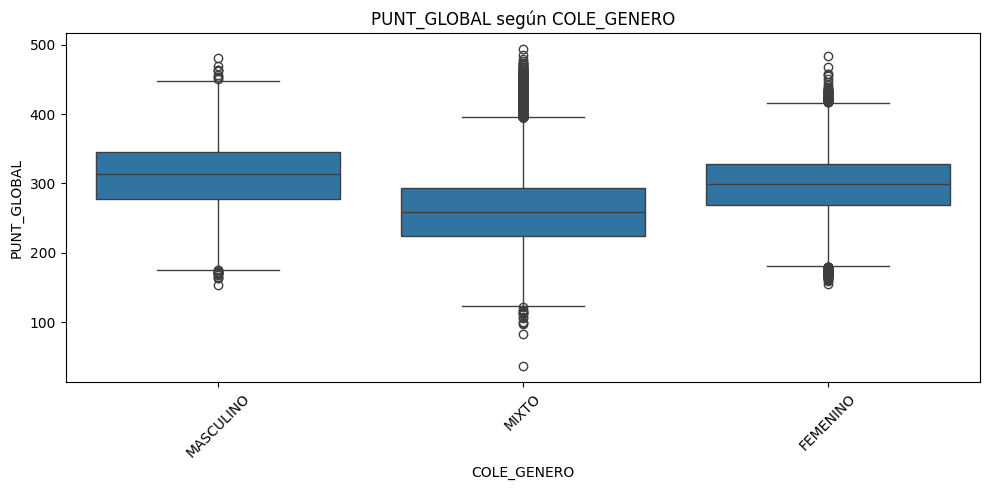

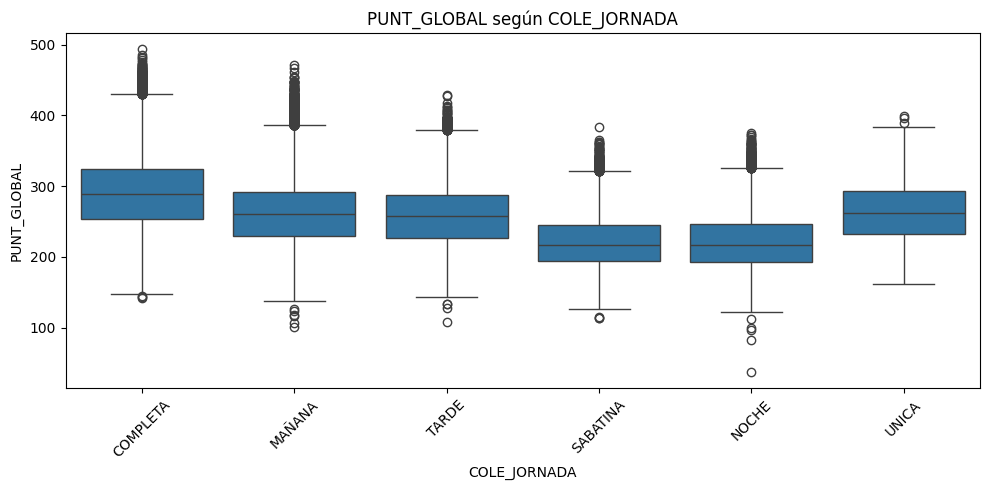

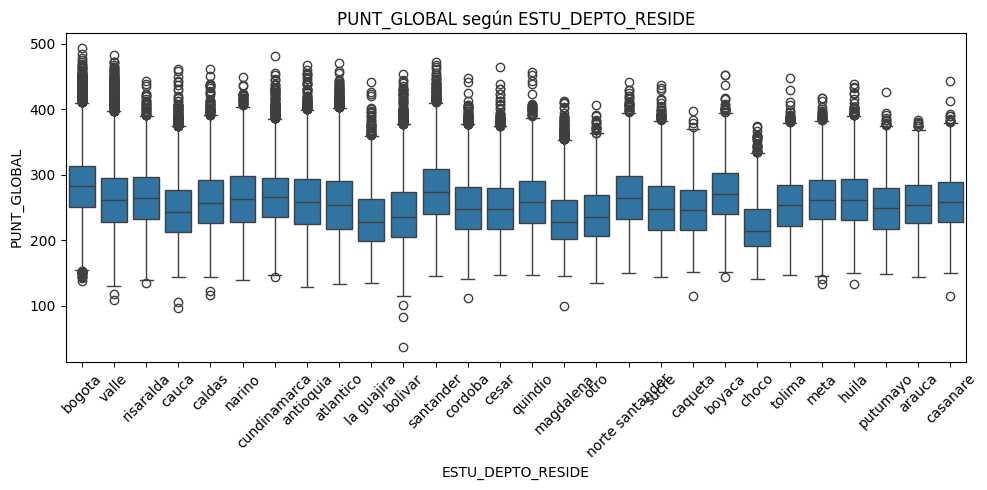

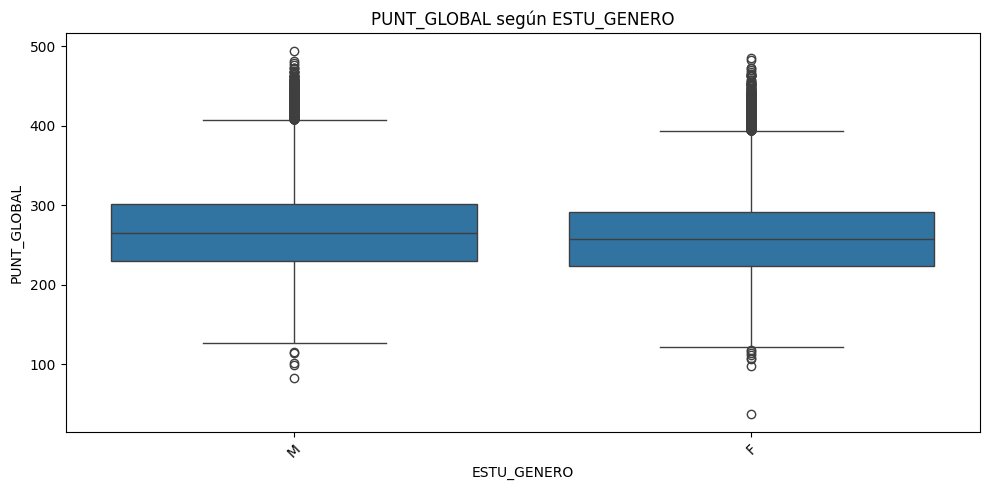

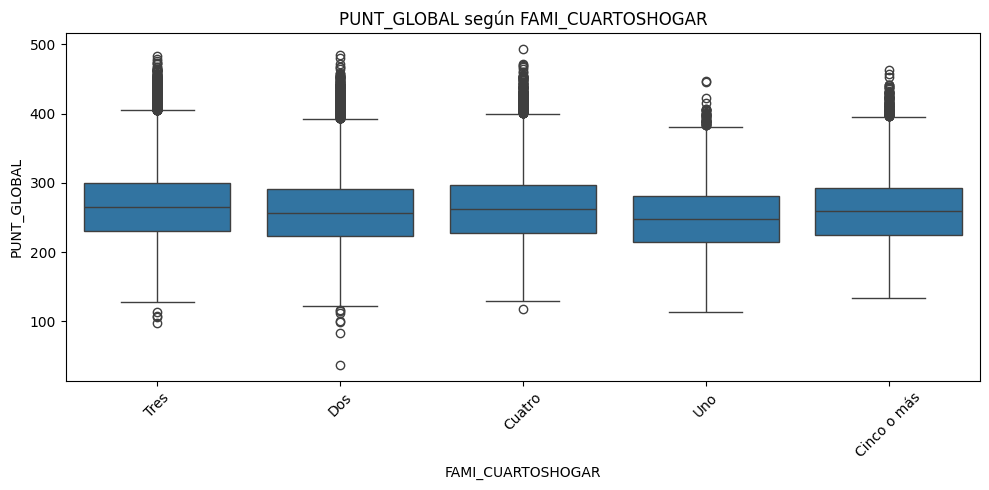

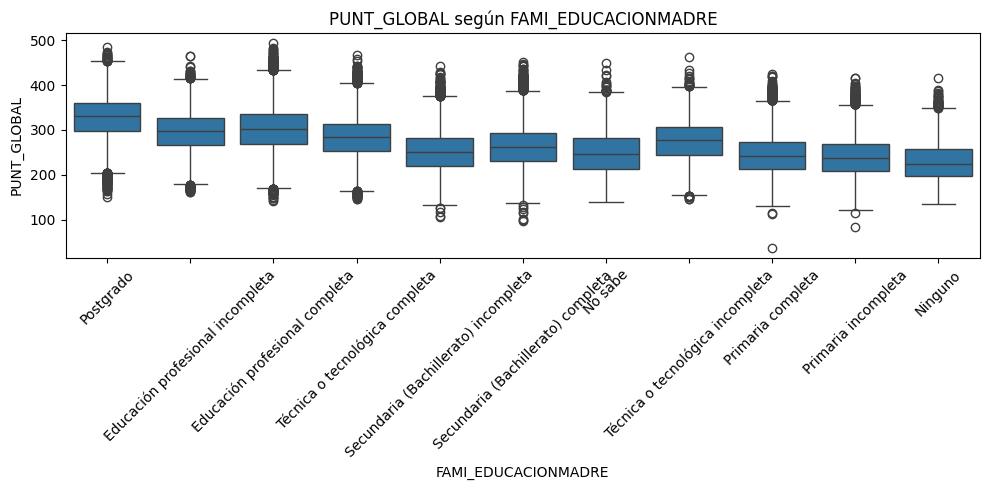

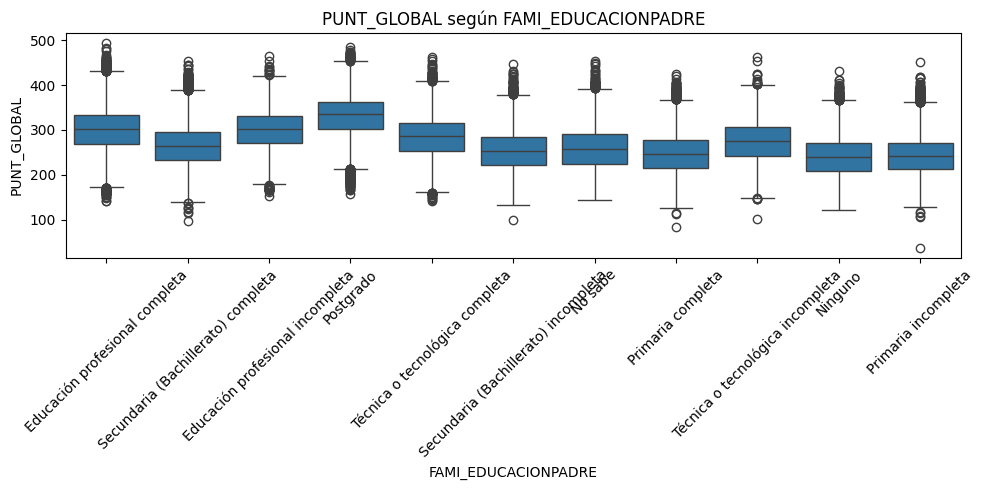

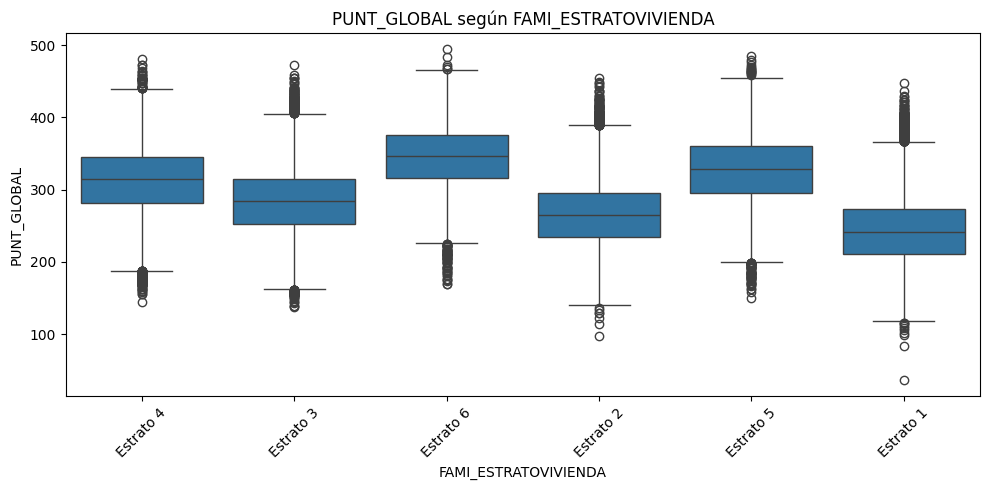

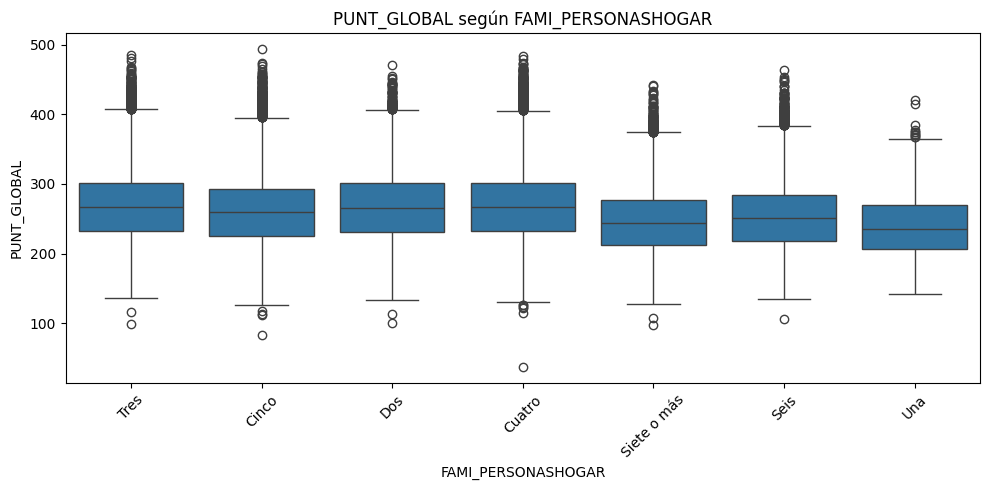

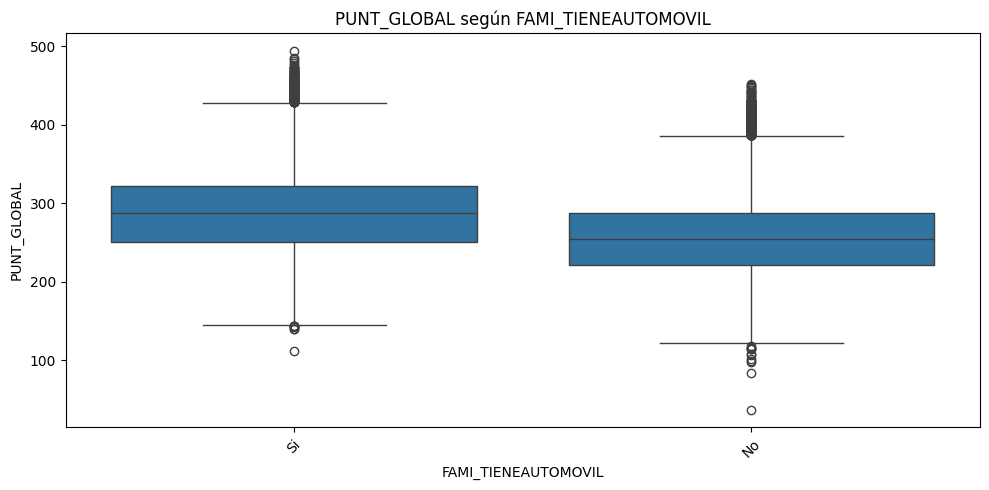

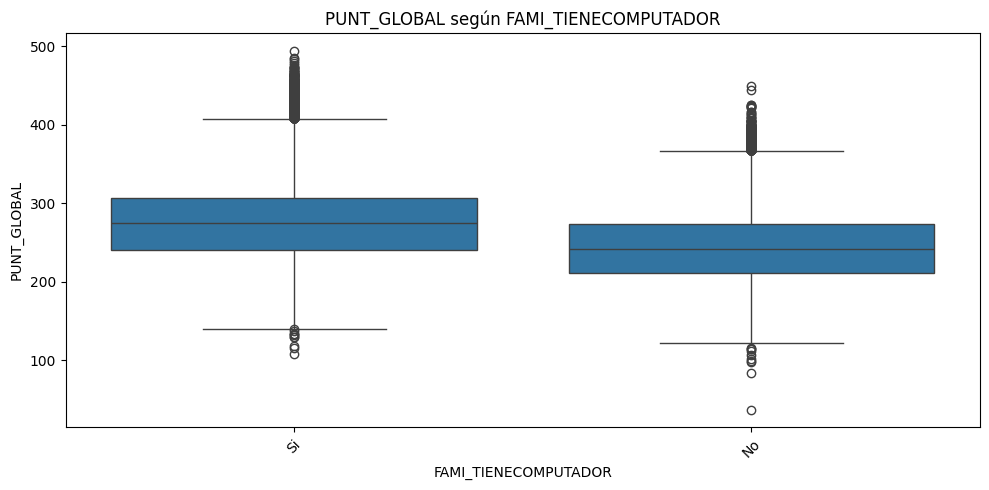

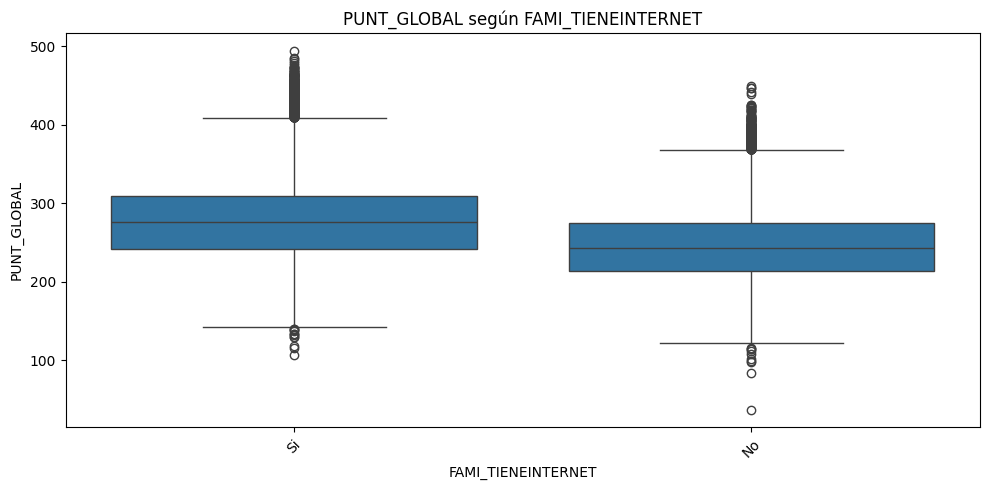

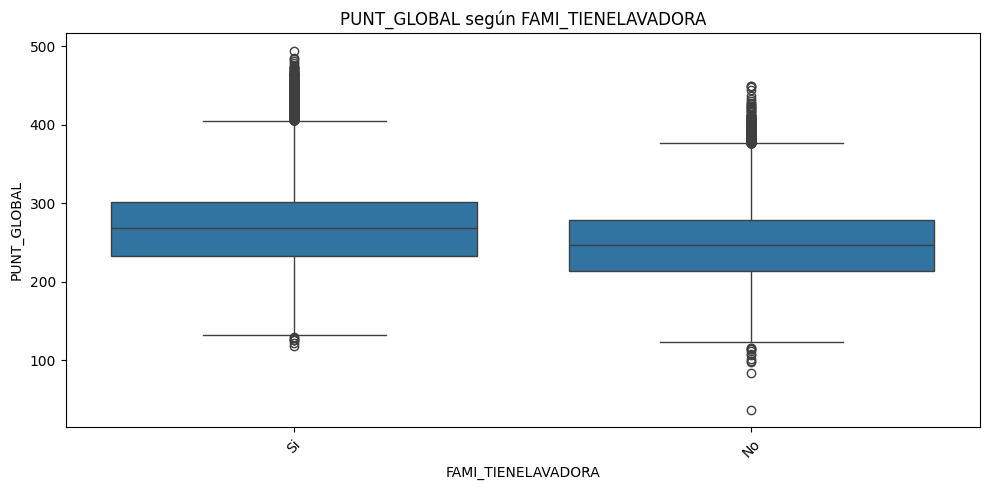

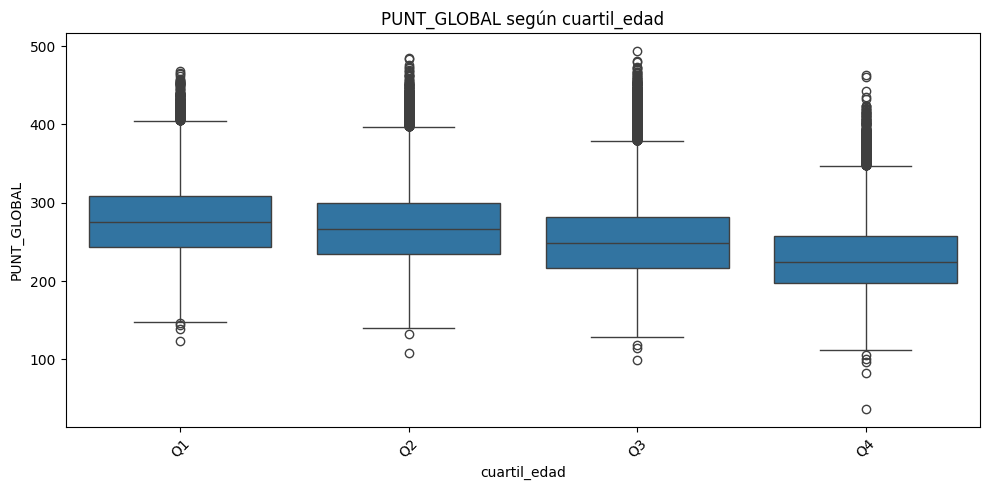

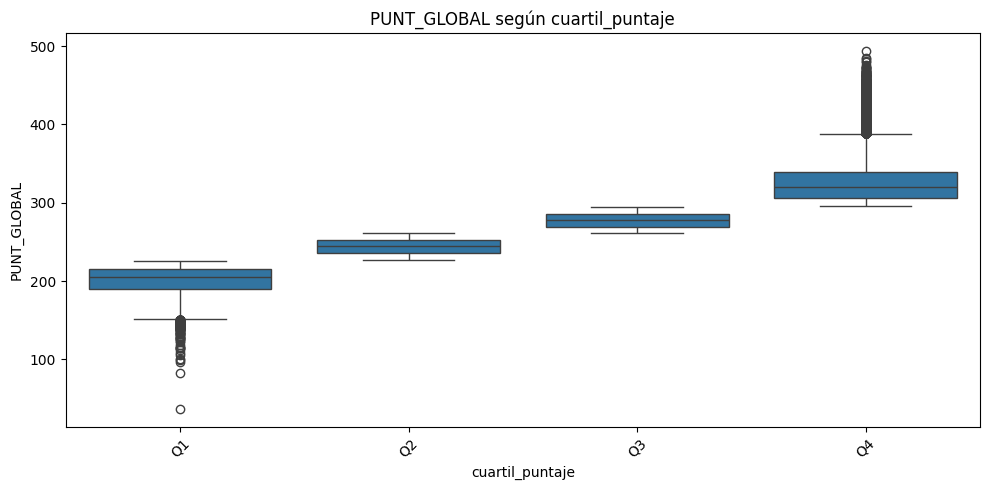

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = df.select_dtypes(include=["object", "category"]).columns
print(cat_vars)

for col in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y="PUNT_GLOBAL", data=df)
    plt.title(f"PUNT_GLOBAL según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Puntaje global categórico vs cada variable categórica

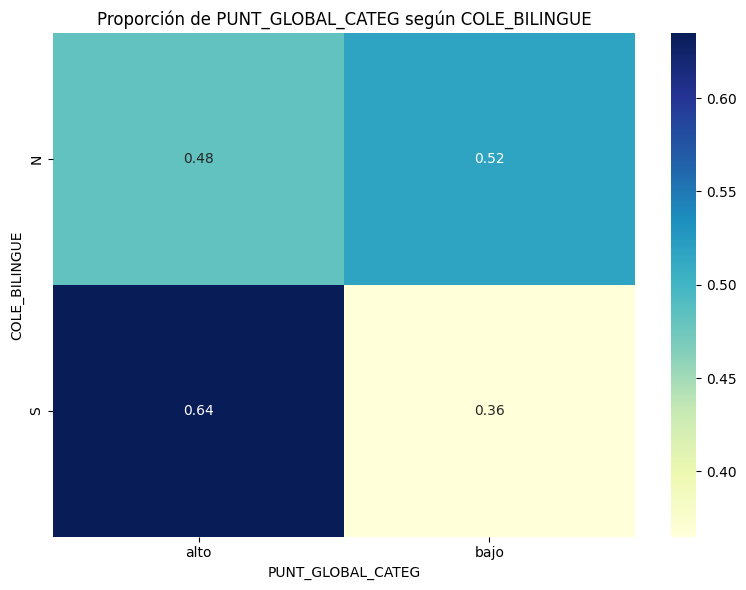

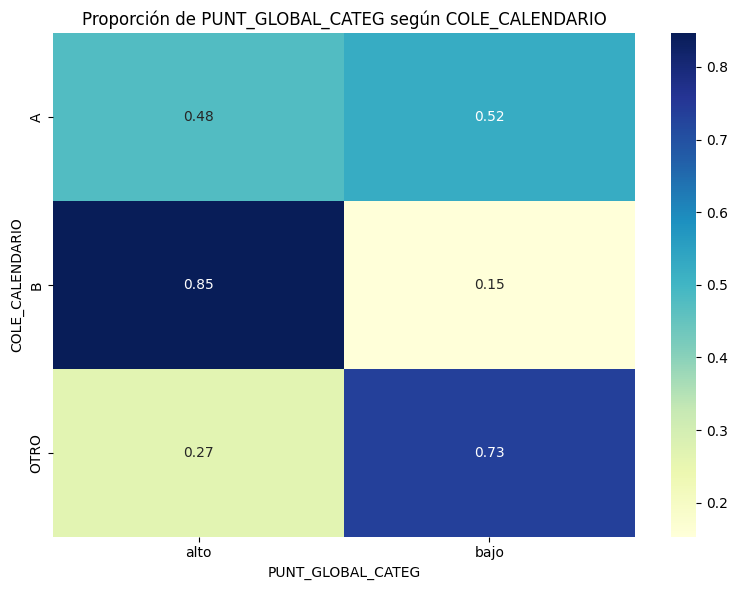

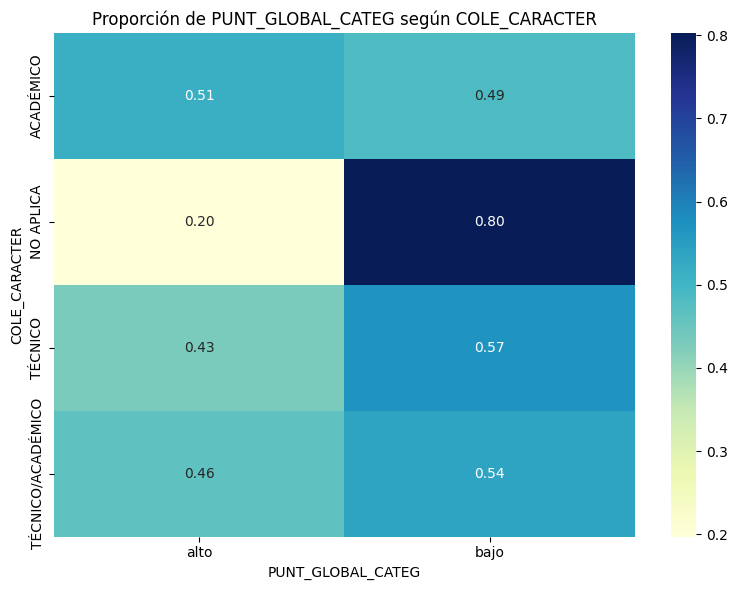

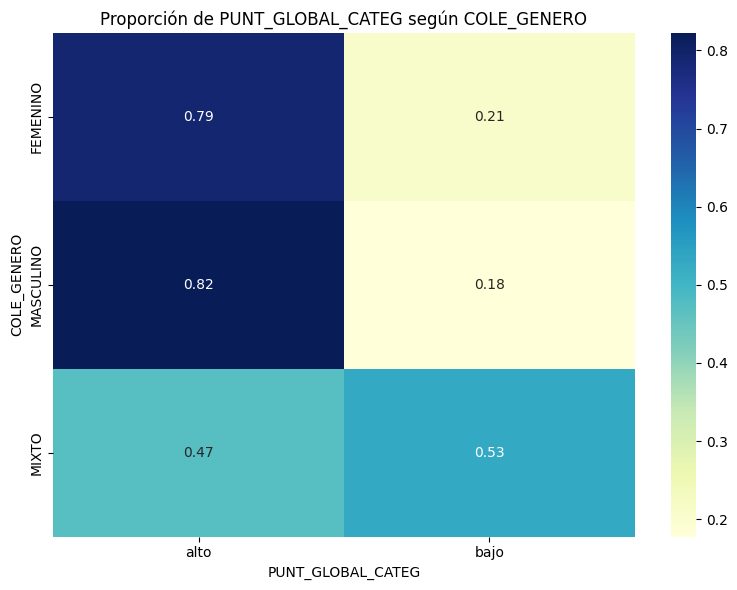

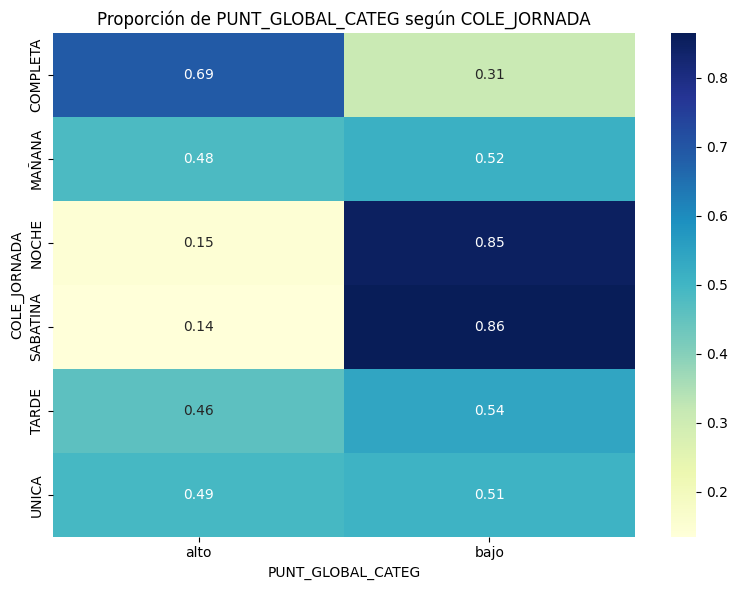

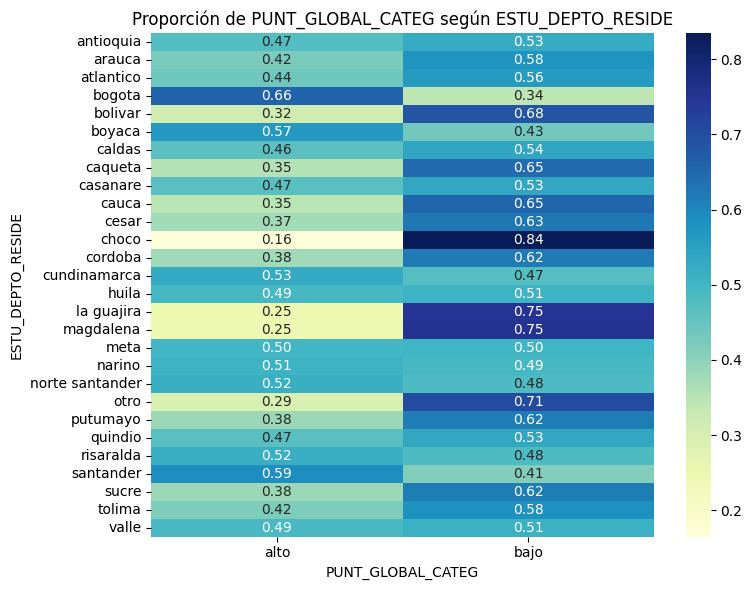

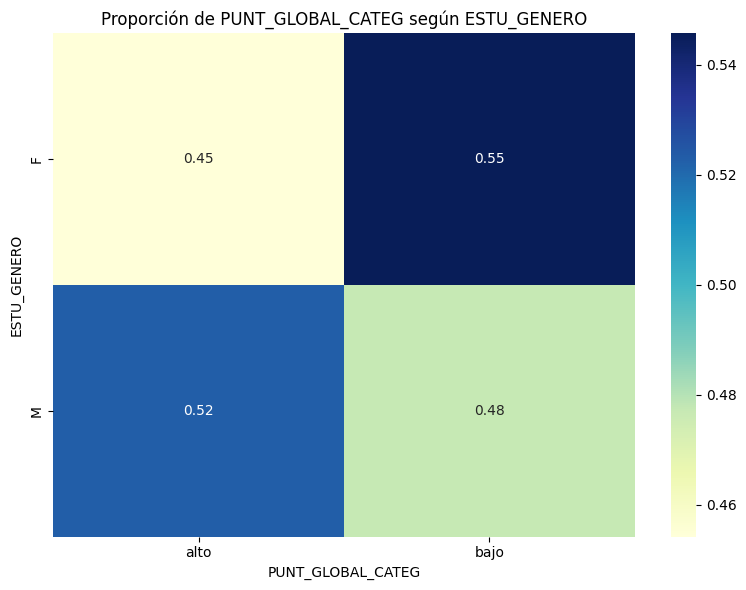

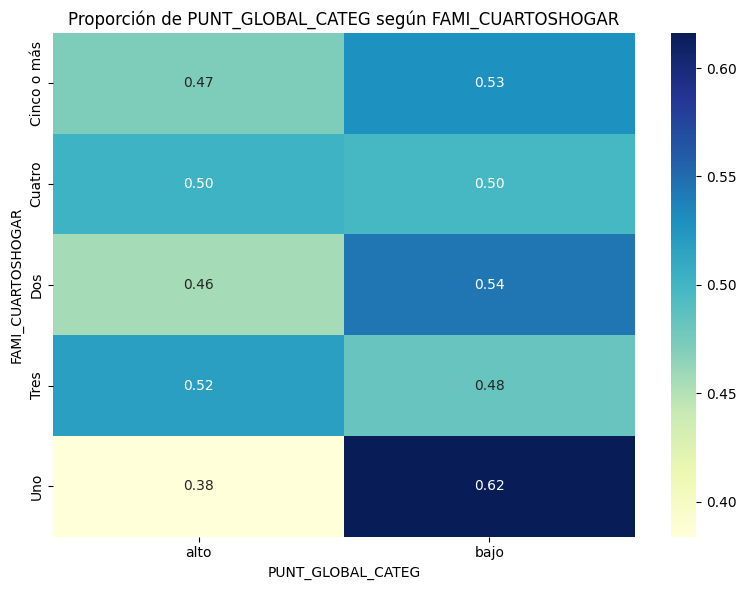

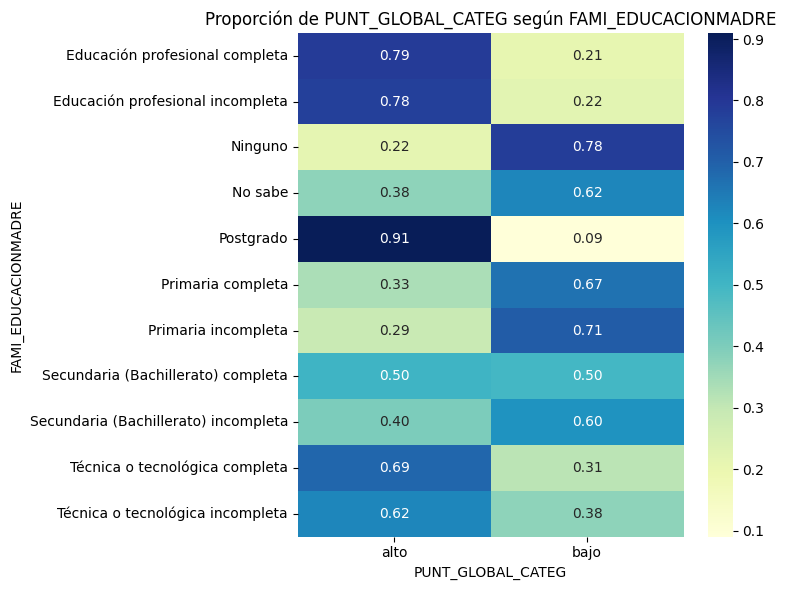

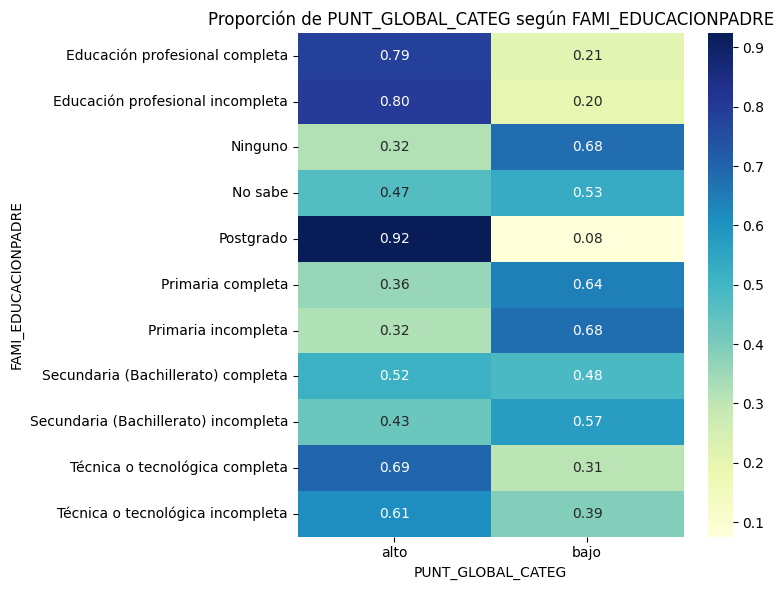

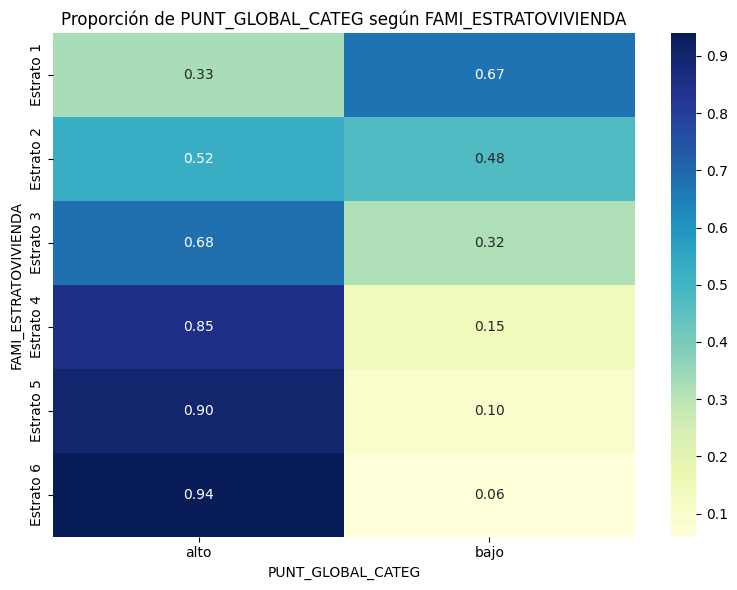

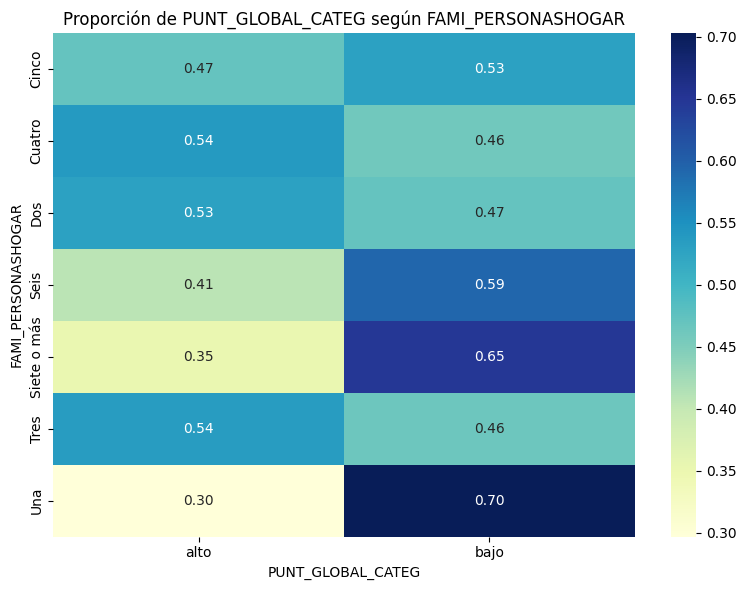

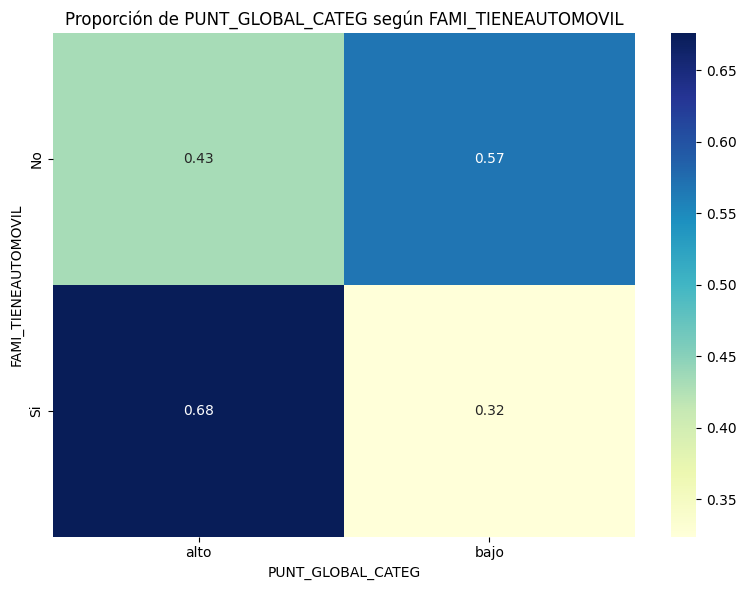

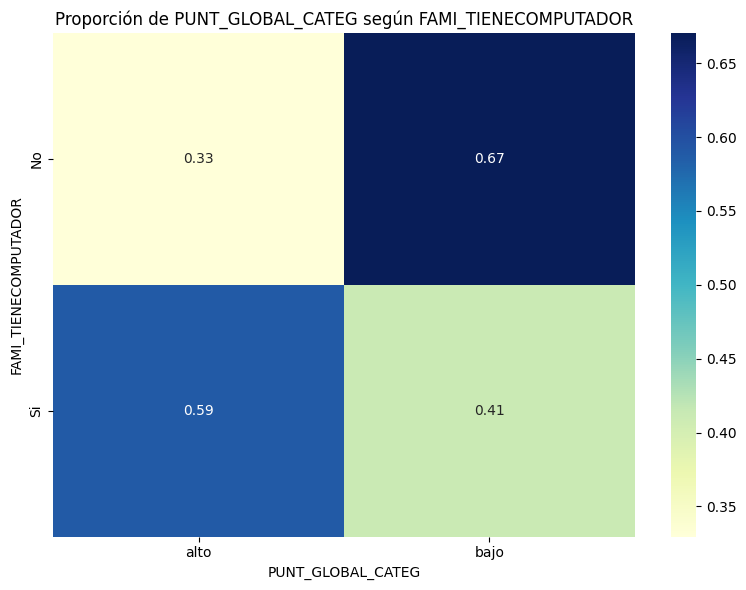

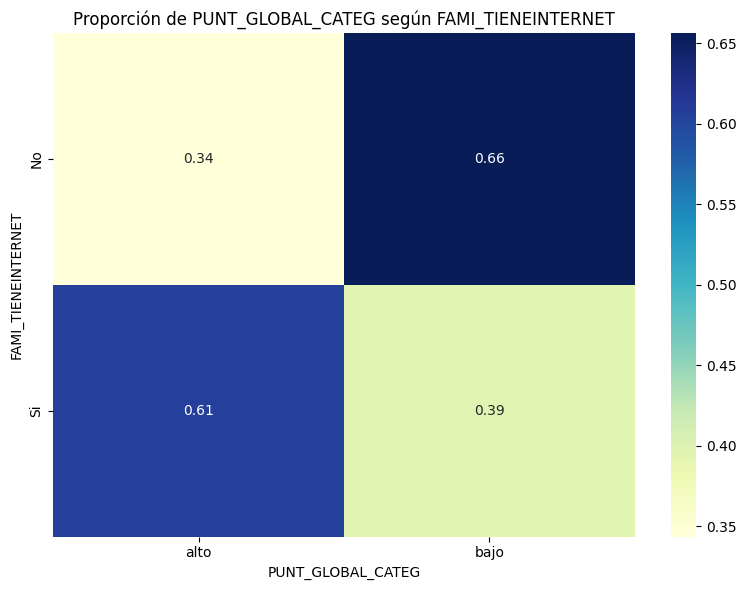

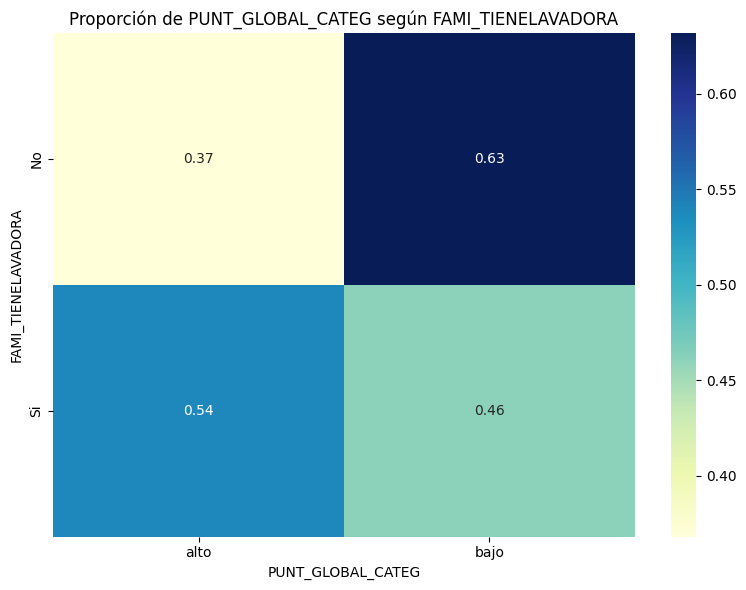

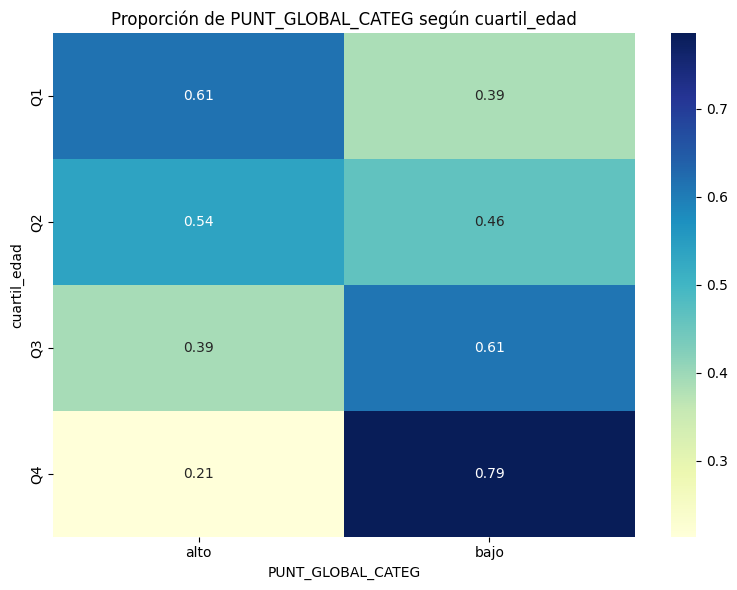

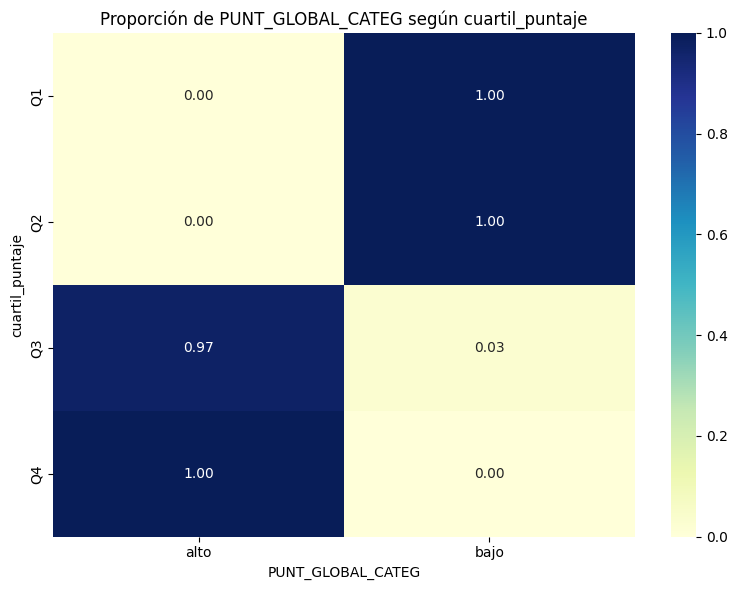

In [19]:
# variables categóricas (excepto la de puntaje)
#cat_vars = df.select_dtypes(include=["object", "category"]).columns
cat_vars = [col for col in cat_vars if col != "puntaje_cat"]

for var in cat_vars:
    tabla = pd.crosstab(df[var], df["puntaje_cat"], normalize='index')  # Proporción por fila
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Proporción de PUNT_GLOBAL_CATEG según {var}")
    plt.xlabel("PUNT_GLOBAL_CATEG")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

# Las filas suman 1


### Balanceo de clases en train

### Modelado y comparación